# **Customer Profiling**

# Description of the work to be done
* The purpose of this work is to be able to segment a group of people on the basis of pre-existing data.

* This is to allow a company to predict which of its future customers are defaulting or not for a loan or a given product.
 
* To do this, we have historical data on the behavior of current customers.

* The dataset used is **Univ.AI** .

* A description and a copy of this dataset is available at the following link: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

# Summary of work done

The work is divided into three main parts:

   ## 1 - Exploratory Analysis
   * This involves loading the data set, visualizing it, plotting histograms and possibly a correlation matrix.

   ## 2 - Modeling
   * This step consists of selecting the variables that will be useful for learning and deleting those that will not.

   * Then, it will be a question of processing the missing data in case there are any.

   * Finally, standardize and build the training and test datasets.

   ## 3 - Model training and evaluation
   * This part is devoted to the implementation of models and their training. Models will be evaluated on metrics.

   * The models we will implement here are classification models: **Random Forest**, **KNN**, **Tree Classifier**, **Bagging Classifier** and **Logistics Regression**.
   * At each training we will display the scores of the models and a confusion matrix.
   
   ## 4 - Selection of the most efficient models
   * Based on the performance of the different models on the test game, we will make a selection of the best model and a search for the optimal hyperparameters for this model.

# **Profilage Clientèle**

#  Description du travail à faire
* Le but de ce travail est de pouvoir sur la base de données pré-existantes segmenter un groupe de personnes.

* Il s'agit ici de permettre à une entreprise de prédire qui de ses futurs clients sont défaillants ou non pour un prêt ou un produit donné.
 
* Pour ce faire, nous disposons de données historiques sur le comportement des clients actuels.

* Le jeu de donées utilisé est **Univ.AI** .

* Une description ainsi qu'une copie de ce dataset est disponible sur le lien suivant: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

# Résumé du travail effectué

Le travail est divisé en trois grandes parties : 

   ## 1 - Analyse Exploratoire
   * Il s'agit de charger le jeu de données, de le visualiser, tracer des hsitogrammes et éventuellemnt une matrice de corrélation .

   ## 2 - Modélisation
   * Cette étape consiste à sélectionner les variables qui seront utiles à l'apprentissage et à supprimer celles qui ne le seront pas.

   * Ensuite, il sera question de traiter les données manquantes au cas où il y en aurait.

   * Enfin, normaliser et constituer les ensembles de données d'apprentissage et de de test.

   ## 3 - Entrainement et évaluation des modèles
   * Cette partie est consacrée à l'implémenation des modèles et leur entrainement. Les modèles seront évalués sur des métriques.

   * Les moèles que nous implémenterons ici sont des modèles de classification : **Random Forest**, **KNN**, **Tree Classifier**, **Bagging Classifier** et **Régression Logistique**. 
   * A chaque entrainement on affichera les scores du modèles et une matrice de confusion.
   
   ## 4 - Selection des modèles les plus performants
   * Sur la base des performances des différents modèles sur le jeu test, nous procéderons à une selection du meilleur modèle et à une recherche des hyperparamètres optimaux pour ce modèle.

# Importation des librairies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import f1_score, accuracy_score,roc_auc_score, classification_report, confusion_matrix
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Analyse Exploratoire du dataset

In [3]:
df = pd.read_csv("Training Data.csv", sep=',')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df = df.drop('Id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [5]:
df.describe(include="all")

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


In [6]:
numeric_features = list(df.select_dtypes("int64").columns)
categorical_features = list(df.select_dtypes("object").columns)

print(f'Variables numériques :\n{numeric_features}\n\nVariables catégorielles:\n{categorical_features}')

Variables numériques :
['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

Variables catégorielles:
['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


### On trace à présent les histogrammes des variables numériques

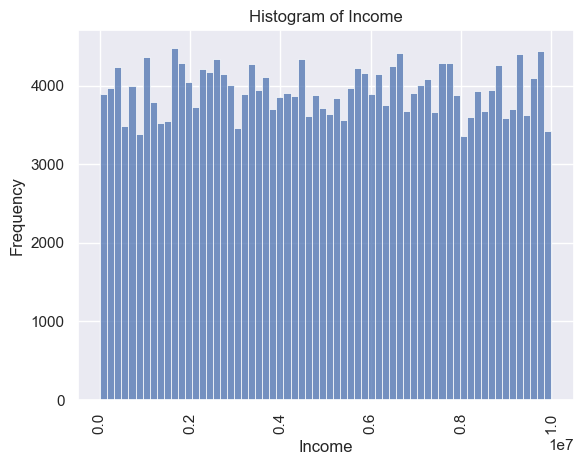

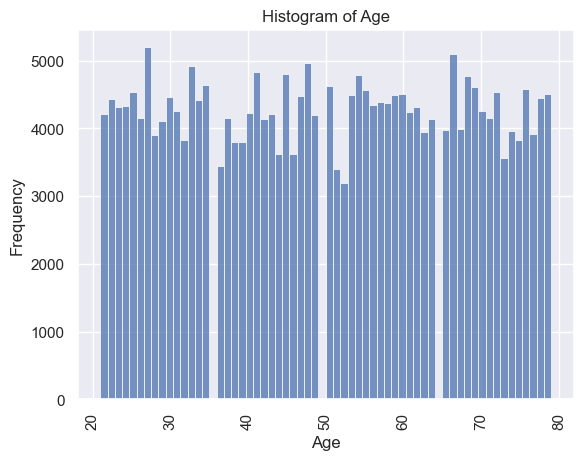

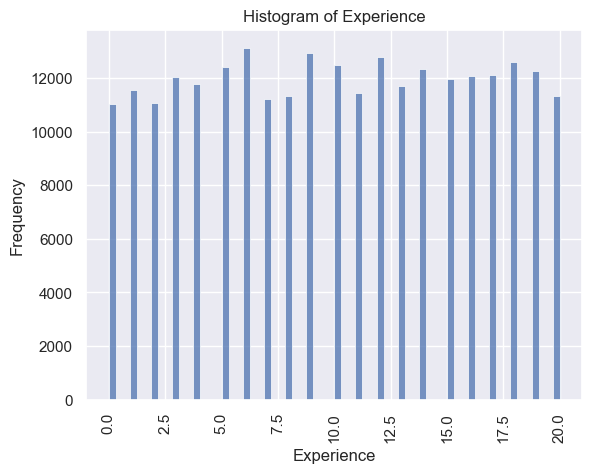

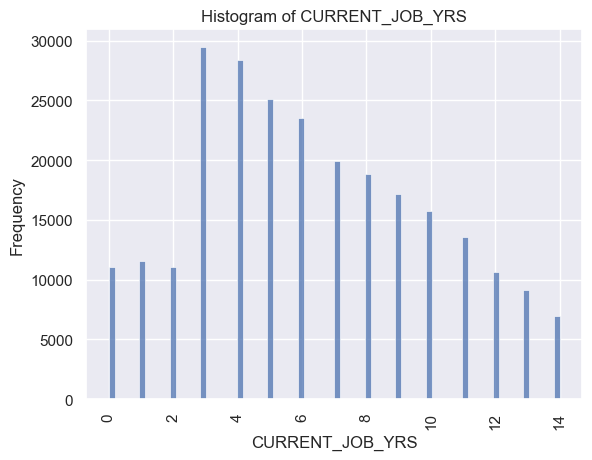

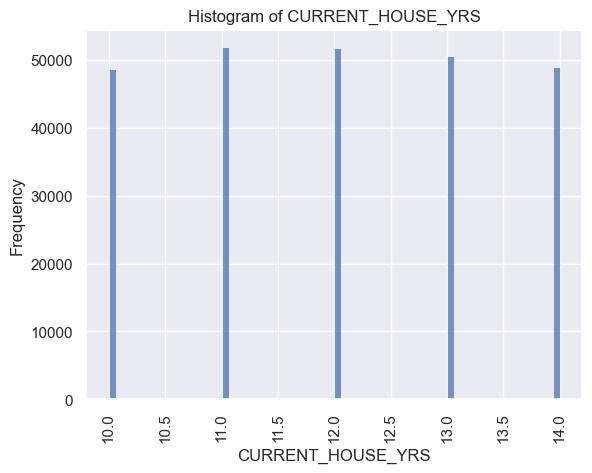

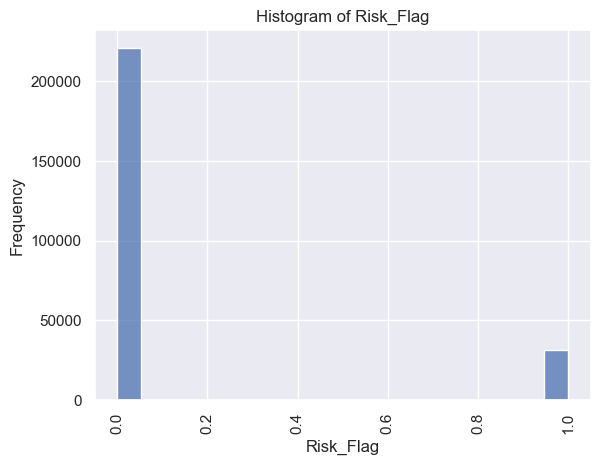

In [7]:
numeric_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
for feature in numeric_features:
    sns.histplot(df[feature])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()


### On trace à présent les histogrammes des variables catégorielles

In [8]:
def segment_profession(profession):
    if profession in ['Mechanical_engineer', 'Design_Engineer', 'Chemical_engineer', 'Biomedical_Engineer',
                      'Computer_hardware_engineer', 'Petroleum_Engineer', 'Civil_engineer',
                      'Industrial_Engineer', 'Technology_specialist']:
        return 'Engineering'
    elif profession in ['Software_Developer', 'Technical_writer', 'Graphic_Designer', 'Web_designer']:
        return 'IT/Software'
    elif profession in ['Civil_servant', 'Politician', 'Police_officer', 'Magistrate', 'Official', 'Army_officer']:
        return 'Government'
    elif profession in ['Librarian', 'Teacher']:
        return 'Education'
    elif profession in ['Economist', 'Financial_Analyst']:
        return 'Finance'
    elif profession in ['Flight_attendant', 'Air_traffic_controller', 'Aviator']:
        return 'Aviation'
    elif profession in ['Architect', 'Designer', 'Fashion_Designer']:
        return 'Design'
    elif profession in ['Physician', 'Dentist', 'Surgeon']:
        return 'Medical Practitioner'
    elif profession in ['Hotel_Manager', 'Chef']:
        return 'Hospitality'
    elif profession == 'Artist':
        return 'Art'
    elif profession in ['Comedian', 'Psychologist']:
        return 'Entertainment'
    elif profession in ['Secretary', 'Computer_operator']:
        return 'Administration'
    elif profession in ['Chartered_Accountant', 'Analyst']:
        return 'Finance/Accounting'
    elif profession in ['Technician', 'Microbiologist', 'Scientist', 'Geologist', 'Statistician']:
        return 'Science/Research'
    else:
        return 'Other'    

In [9]:
df['Profession'] = df['Profession'].apply(segment_profession)

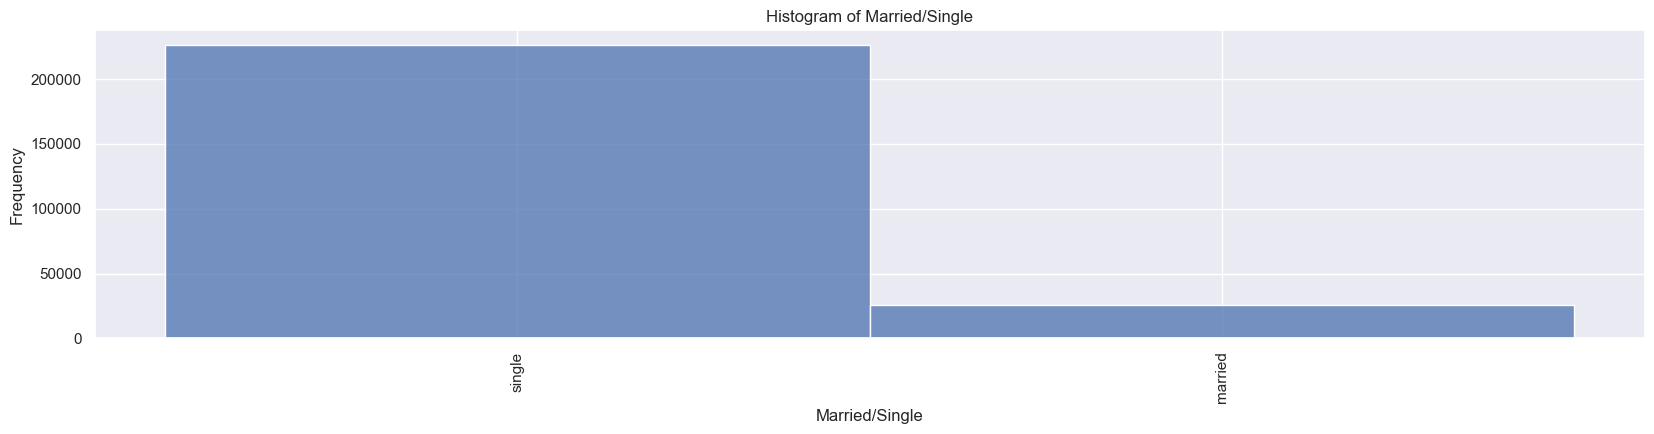

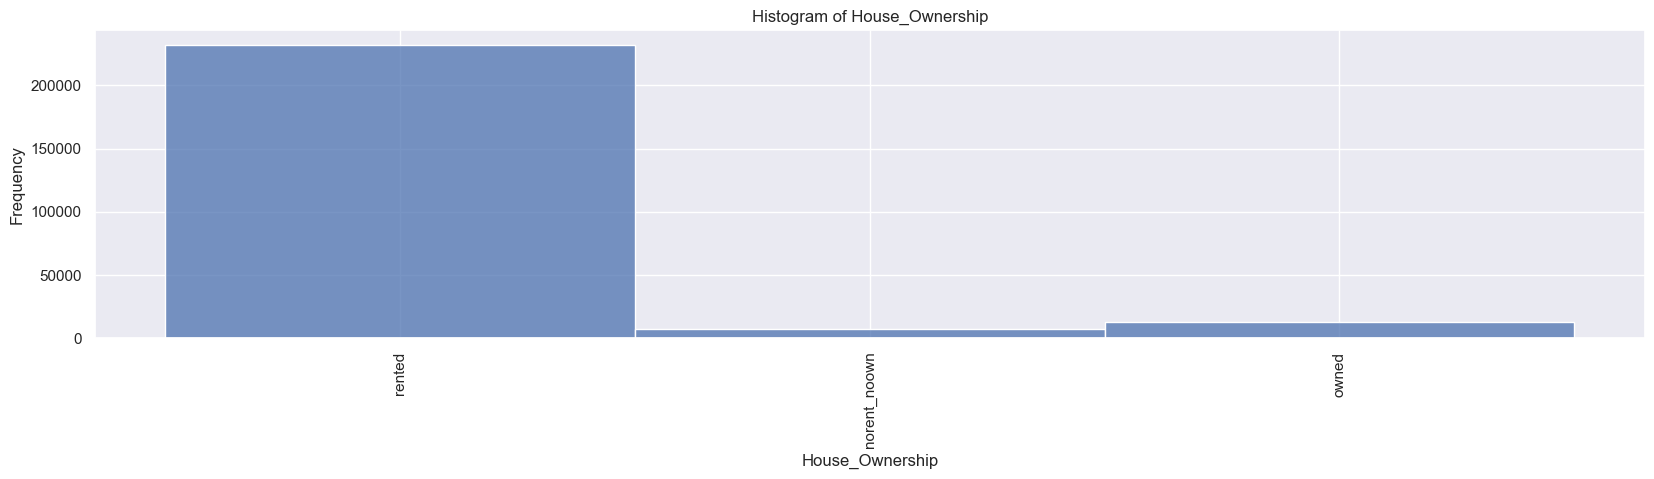

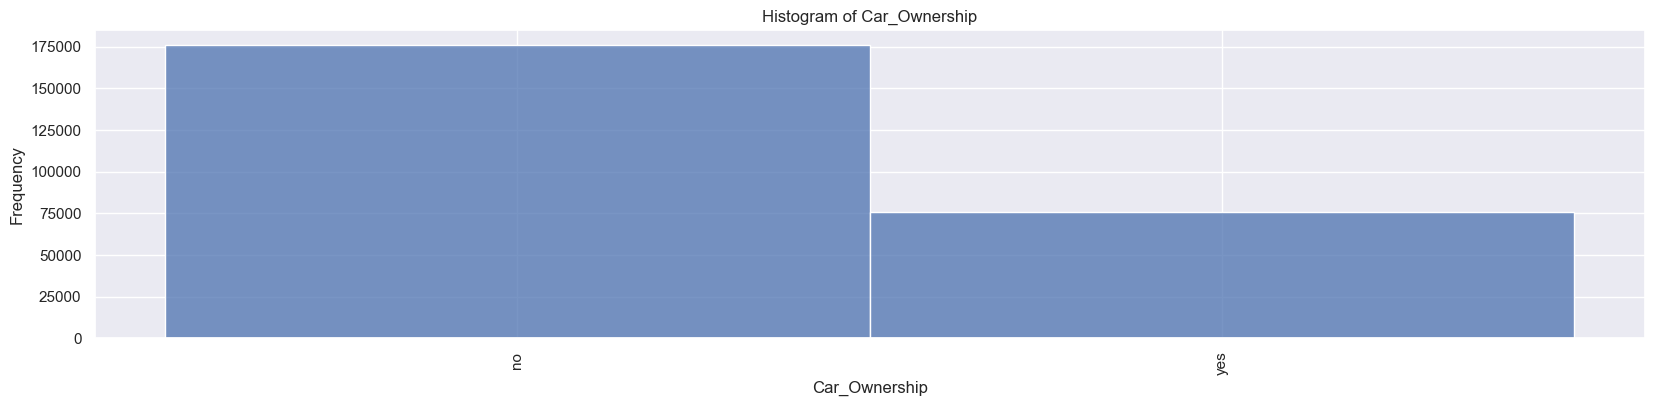

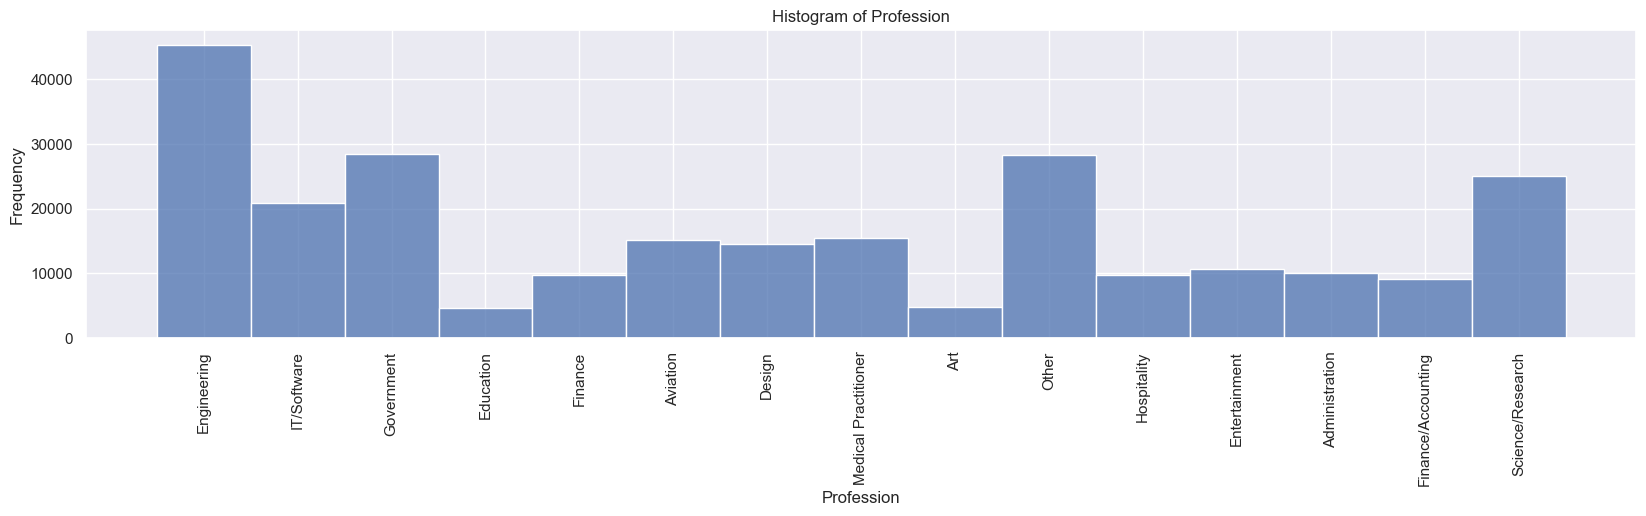

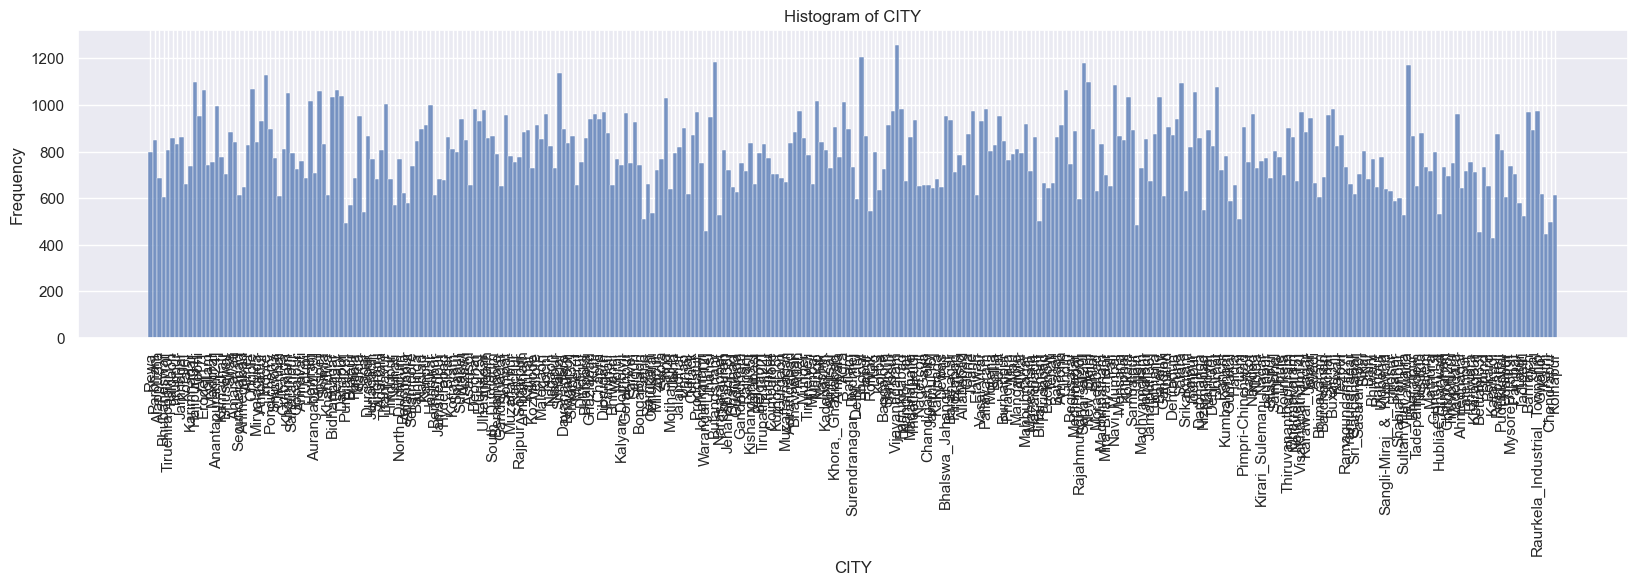

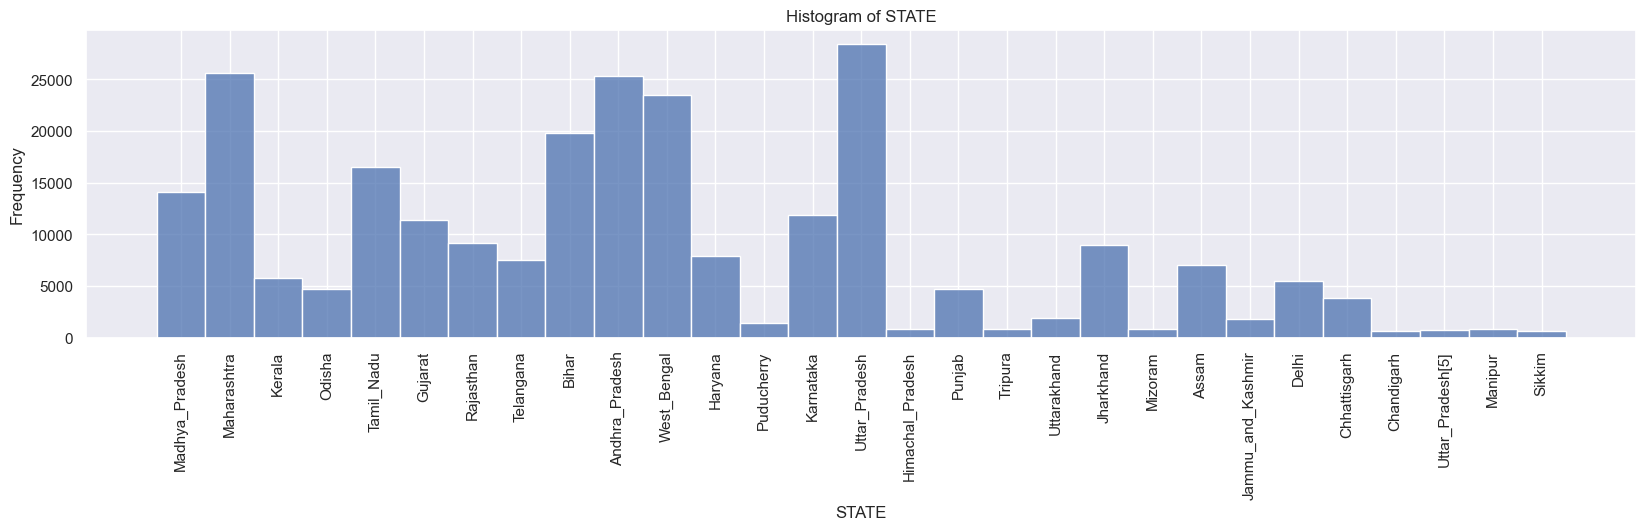

In [10]:
categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
for feature in categorical_features:
    plt.figure(figsize=(20,4))
    sns.histplot(df[feature])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()


#### Suppresion de données qu'on utilisera pas

In [11]:
df_en = df.copy()

df_en = df_en.drop('CITY',axis=1)
df_en = df_en.drop('STATE',axis=1)

In [12]:
df_en

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Engineering,3,13,0
1,7574516,40,10,single,rented,no,IT/Software,9,13,0
2,3991815,66,4,married,rented,no,IT/Software,4,10,0
3,6256451,41,2,single,rented,yes,IT/Software,2,12,1
4,5768871,47,11,single,rented,no,Government,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Medical Practitioner,6,11,0
251996,2843572,26,10,single,rented,no,Government,6,11,0
251997,4522448,46,7,single,rented,no,Engineering,7,12,0
251998,6507128,45,0,single,rented,no,IT/Software,0,10,0


## Matrice de corrélation

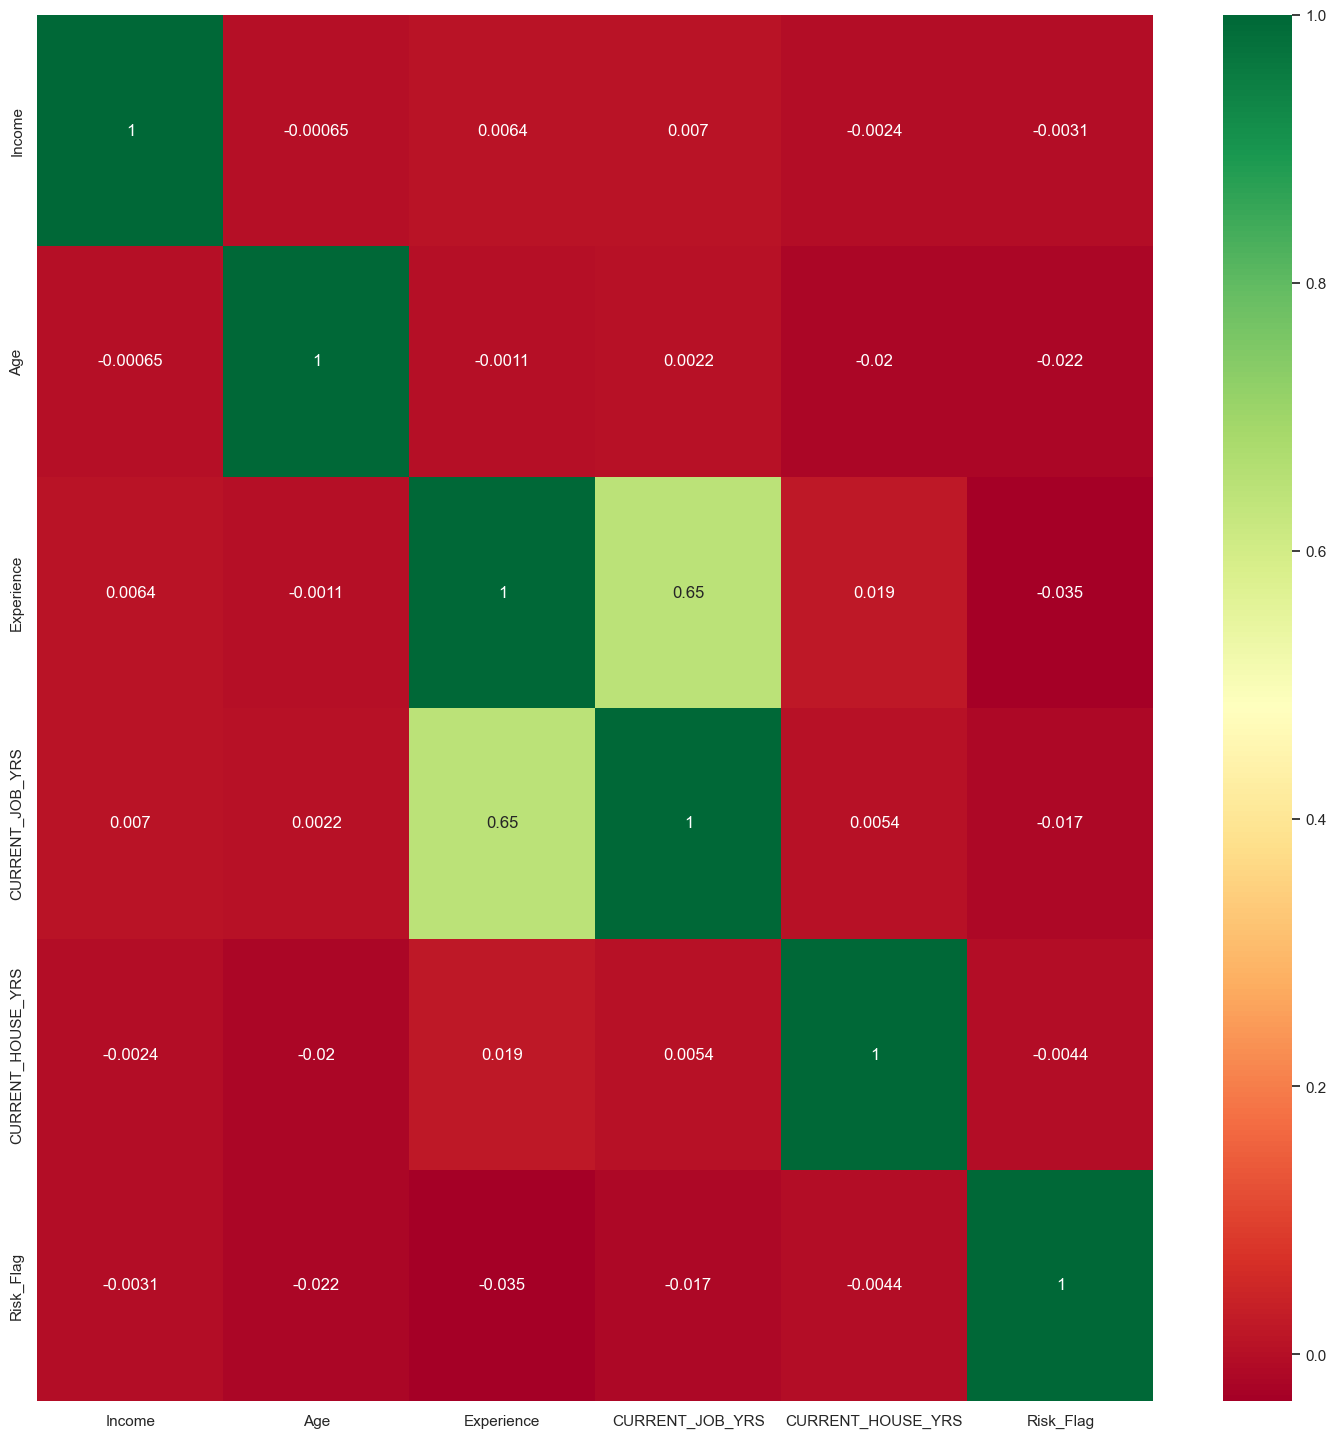

In [13]:
plt.figure(figsize=(18,18))
sns.heatmap(df_en.corr(),annot=True,cmap='RdYlGn')

plt.show()

### Encodage des variables catégorielles

In [14]:
encoder = LabelEncoder()

categorical = ['Married/Single', 'House_Ownership', 'Car_Ownership','Profession']

for feature in categorical:
    df_en[feature] = encoder.fit_transform(df_en[feature])

df_en.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,5,3,13,0
1,7574516,40,10,1,2,0,11,9,13,0
2,3991815,66,4,0,2,0,11,4,10,0
3,6256451,41,2,1,2,1,11,2,12,1
4,5768871,47,11,1,2,0,9,3,14,1


## Normalisation des données

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in [df_en.columns]:
    df_en[i] = scaler.fit_transform(df_en[i])
    

df_en.describe()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,0.499198,0.499208,0.504222,0.897905,0.945861,0.301587,0.571494,0.452420,0.499448,0.123000
std,0.288130,0.294204,0.300129,0.302774,0.195940,0.458948,0.299660,0.260504,0.349759,0.328438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249529,0.241379,0.250000,1.000000,1.000000,0.000000,0.357143,0.214286,0.250000,0.000000
50%,0.499557,0.500000,0.500000,1.000000,1.000000,0.000000,0.642857,0.428571,0.500000,0.000000
75%,0.747495,0.758621,0.750000,1.000000,1.000000,1.000000,0.857143,0.642857,0.750000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df_en

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129487,0.034483,0.15,1.0,1.0,0.0,0.357143,0.214286,0.75,0.0
1,0.757206,0.327586,0.50,1.0,1.0,0.0,0.785714,0.642857,0.75,0.0
2,0.398564,0.775862,0.20,0.0,1.0,0.0,0.785714,0.285714,0.00,0.0
3,0.625263,0.344828,0.10,1.0,1.0,1.0,0.785714,0.142857,0.50,1.0
4,0.576454,0.448276,0.55,1.0,1.0,0.0,0.642857,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,1.0,0.0,0.857143,0.428571,0.25,0.0
251996,0.283620,0.086207,0.50,1.0,1.0,0.0,0.642857,0.428571,0.25,0.0
251997,0.451682,0.431034,0.35,1.0,1.0,0.0,0.357143,0.500000,0.50,0.0
251998,0.650356,0.413793,0.00,1.0,1.0,0.0,0.785714,0.000000,0.00,0.0


# Modélisation

In [17]:
X = df_en.drop(columns='Risk_Flag')
y = df_en['Risk_Flag']

In [18]:
#On sépare le jeu de données en Test et Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df_en['Risk_Flag'] )


def useModel(model,X_train, X_test, y_train, y_test ):

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Classification report : ")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)),
          "\t Train AUC : ", roc_auc_score(y_train, model.predict(X_train)))
    
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)),
          "\t Test AUC : ", roc_auc_score(y_test, model.predict(X_test)),"\n \n")
    
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)),
         "\t Train AUC : ", roc_auc_score(y_train, model.predict(X_train)))
    
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)),
         "\t Test AUC : ", roc_auc_score(y_test, model.predict(X_test)),"\n \n")
    
    # Matrice de confusion
    sns.set_palette(sns.color_palette())
    _, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 20})  
    labels = ['True','False']
    ax.set_xticklabels(labels, fontsize=13);
    ax.set_yticklabels(labels[::1], fontsize=13);
    ax.set_ylabel('Prediction', fontsize=13);
    ax.set_xlabel('Ground Truth', fontsize=13)
    ax.set_title("Confussion - Matix")
    
    

# Entrainement et évaluation des modèles 

## KNN

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     66301
         1.0       0.55      0.50      0.52      9299

    accuracy                           0.89     75600
   macro avg       0.74      0.72      0.73     75600
weighted avg       0.88      0.89      0.89     75600

Train Accuracy :  0.900266439909297 	 Train AUC :  0.7439231268257908
Test Accuracy :  0.888452380952381 	 Test AUC :  0.7197799310333427 
 

Train Accuracy :  0.900266439909297 	 Train AUC :  0.7439231268257908
Test Accuracy :  0.888452380952381 	 Test AUC :  0.7197799310333427 
 



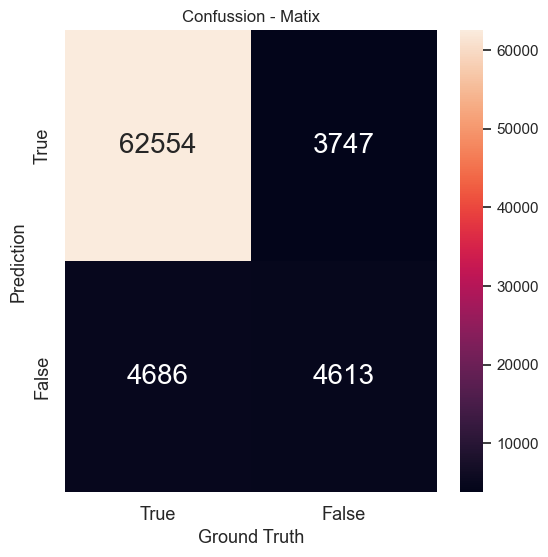

In [19]:
from sklearn.neighbors import KNeighborsClassifier

useModel(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

##  Random Forest

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     66301
         1.0       0.60      0.55      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600

Train Accuracy :  0.9369727891156463 	 Train AUC :  0.8844395456461499
Test Accuracy :  0.8991931216931217 	 Test AUC :  0.7480466629491798 
 

Train Accuracy :  0.9369727891156463 	 Train AUC :  0.8844395456461499
Test Accuracy :  0.8991931216931217 	 Test AUC :  0.7480466629491798 
 



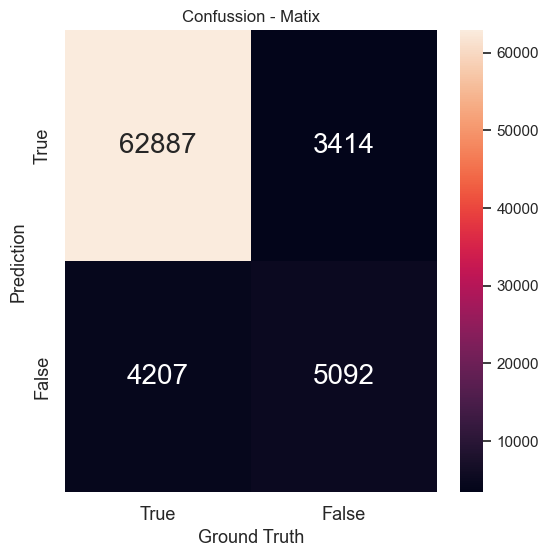

In [20]:
from sklearn.ensemble import RandomForestClassifier

useModel(RandomForestClassifier(),  X_train, X_test, y_train, y_test)

##  Arbre de décison


The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93     66301
         1.0       0.52      0.58      0.55      9299

    accuracy                           0.88     75600
   macro avg       0.73      0.75      0.74     75600
weighted avg       0.89      0.88      0.88     75600

Train Accuracy :  0.9369897959183674 	 Train AUC :  0.8759496100012025
Test Accuracy :  0.882089947089947 	 Test AUC :  0.751563074079673 
 

Train Accuracy :  0.9369897959183674 	 Train AUC :  0.8759496100012025
Test Accuracy :  0.882089947089947 	 Test AUC :  0.751563074079673 
 



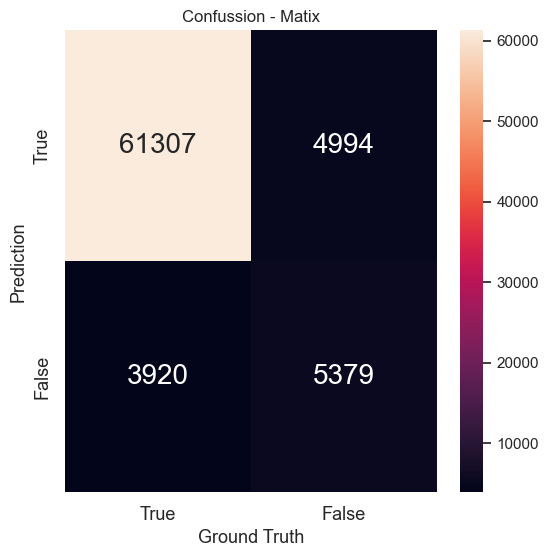

In [21]:
from sklearn.tree import DecisionTreeClassifier

useModel(DecisionTreeClassifier(),  X_train, X_test, y_train, y_test)

## Bagging Classifier

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     66301
         1.0       0.58      0.56      0.57      9299

    accuracy                           0.90     75600
   macro avg       0.76      0.75      0.76     75600
weighted avg       0.89      0.90      0.90     75600

Train Accuracy :  0.9328514739229025 	 Train AUC :  0.8696673435420063
Test Accuracy :  0.8964682539682539 	 Test AUC :  0.7517631177110765 
 

Train Accuracy :  0.9328514739229025 	 Train AUC :  0.8696673435420063
Test Accuracy :  0.8964682539682539 	 Test AUC :  0.7517631177110765 
 



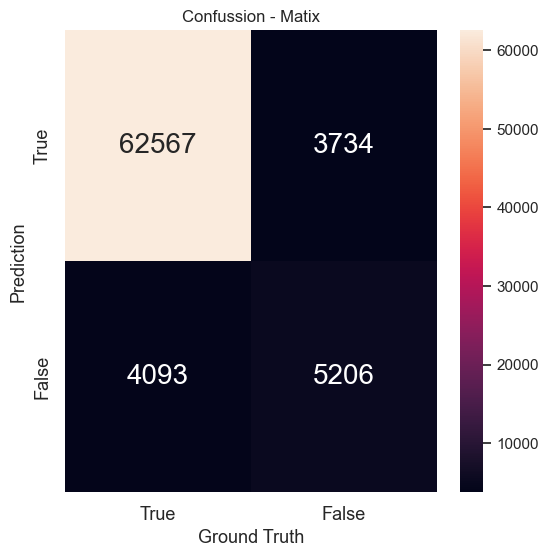

In [22]:
from sklearn.ensemble import BaggingClassifier

useModel(BaggingClassifier(), X_train, X_test, y_train, y_test)

##  Régression Logistique

The Classification report : 
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93     66301
         1.0       0.00      0.00      0.00      9299

    accuracy                           0.88     75600
   macro avg       0.44      0.50      0.47     75600
weighted avg       0.77      0.88      0.82     75600

Train Accuracy :  0.8770011337868481 	 Train AUC :  0.5
Test Accuracy :  0.8769973544973545 	 Test AUC :  0.5 
 

Train Accuracy :  0.8770011337868481 	 Train AUC :  0.5
Test Accuracy :  0.8769973544973545 	 Test AUC :  0.5 
 



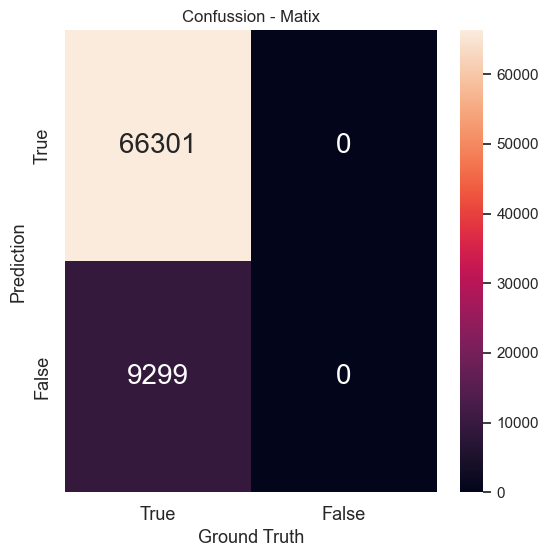

In [29]:
from sklearn.linear_model import LogisticRegression

useModel(LogisticRegression(), X_train, X_test, y_train, y_test)

# Sélection de modèle

* Pour sélectionner un modèle nous nous basons ici sur le accuracy de ce modèle sur le jeu de données Test. 
* Le modèle qui présente donc le meilleur score **Accuracy** est le **Random Forest** : **89.89%**. 
* Son **AUC** est aussi le meilleur : **74,8%**

# Recherche des hyperparamètres optimaux

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 20),
    'max_depth': [None] + list(range(5, 20, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

model = RandomForestClassifier()

search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, scoring='accuracy', cv=3, n_iter=10)
search.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E918FF9990>},
                   scoring='accuracy')

In [30]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Train Accuracy : ", accuracy_score(y_train, model.predict(X_train)),
          "\t Train AUC : ", roc_auc_score(y_train, model.predict(X_train)))
    
    print("Test Accuracy : ", accuracy_score(y_test, model.predict(X_test)),
          "\t Test AUC : ", roc_auc_score(y_test, model.predict(X_test)),"\n \n")

In [31]:
best_params = search.best_params_
best_params

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 12}

In [32]:
best_model = search.best_estimator_
get_accuracy(X_train, X_test, y_train, y_test, best_model)

Train Accuracy :  0.9332482993197279 	 Train AUC :  0.866465993115692
Test Accuracy :  0.8973941798941799 	 Test AUC :  0.7446171887711074 
 



# Enregistrement du modèle

In [28]:
import pickle

pickle.dump(best_model, open('Modèle de prédiction de prêt.pkl', 'wb'))